## Data Import and Curation

In [5]:
import pandas as pd


data = pd.read_csv('olist_order_reviews_dataset.csv')


review_list_subset = data.loc[~data['review_comment_message'].isna()]

review_list_subset['sentiment'] = 1

review_list_subset.loc[review_list_subset['review_score']<4,'sentiment']= 0



review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.lower()


review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.replace('!',' ')

review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.replace('.',' ')

review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.replace(',',' ')

review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.replace('-',' ')

review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.replace('_',' ')

review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.replace('0|1|2|3|4|5|6|7|8|9',' ',regex=True)


# review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].apply(remove_stopwords)

review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.strip()

review_list_subset = review_list_subset.sample(frac=0.1)
data = review_list_subset[['review_comment_message','sentiment']]
data.columns = ['text','emotion']

train_index = int(len(data)*0.9)
train_data = data[:train_index]
test_data = data[train_index:]



/var/folders/jw/qb6bs44j0vgfsf52lxw71h300000gn/T/ipykernel_86006/1198861471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_list_subset['sentiment'] = 1
/var/folders/jw/qb6bs44j0vgfsf52lxw71h300000gn/T/ipykernel_86006/1198861471.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_list_subset['review_comment_message'] = review_list_subset['review_comment_message'].str.lower()
/var/folders/jw/qb6bs44j0vgfsf52lxw71h300000gn/T/ipykernel_86006/1198861471.py:18: SettingWithCopyWarning: 
A value

## Pre-processing & One hot encoding

In [6]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords data
nltk.download('stopwords')

# Get the set of Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Expanded dataset (now in Portuguese)


# Tokenization and embedding with stopword removal and normalization
def tokenize(text):
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords and non-alphabetic characters (including Portuguese accented characters)
    return [re.sub(r'[^a-záàâãéèêíïóôõöúçñ]', '', word) for word in words if word not in stop_words and re.sub(r'[^a-záàâãéèêíïóôõöúçñ]', '', word)]

tokenized_text = [tokenize(sentence) for sentence in train_data['text']]
all_words = [word for sentence in tokenized_text for word in sentence if word]  # Exclude empty strings
unique_words = list(set(all_words))
word_index = {word: i for i, word in enumerate(unique_words)}
sequences = [[word_index[word] for word in sentence if word in word_index] for sentence in tokenized_text]

max_length = max(len(seq) for seq in sequences)
vocab_size = len(word_index)

train_matrix = np.zeros((len(sequences), max_length, vocab_size))
for i, sequence in enumerate(sequences):
    for j, word_idx in enumerate(sequence):
        train_matrix[i, j, word_idx] = 1.0

# Print some information about the processed text
print("Vocabulary size:", vocab_size)
print("Max sequence length:", max_length)
print("Sample processed sentence:", tokenized_text[0])

## For test data

tokenized_text = [tokenize(sentence) for sentence in test_data['text']]
all_words = [word for sentence in tokenized_text for word in sentence if word]  # Exclude empty strings
# unique_words = list(set(all_words))
word_index = {word: i for i, word in enumerate(unique_words)}
sequences = [[word_index[word] for word in sentence if word in word_index] for sentence in tokenized_text]

# max_length = max(len(seq) for seq in sequences)
# vocab_size = len(word_index)

test_matrix = np.zeros((len(sequences), max_length, vocab_size))
for i, sequence in enumerate(sequences):
    for j, word_idx in enumerate(sequence):
        test_matrix[i, j, word_idx] = 1.0



# The rest of your code (model definition, training loop, etc.) goes here...

Vocabulary size: 4147
Max sequence length: 27
Sample processed sentence: ['ótimo', 'produto', 'prazo', 'rápido']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adhokshaja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
test_matrix.shape

(410, 27, 4147)

## Forward and Back Propagation

Epoch 1, Loss: 1.0993677653544227
Epoch 2, Loss: 1.1615918079815184
Epoch 3, Loss: 0.731811093625702
Epoch 4, Loss: 0.7126078497989433
Epoch 5, Loss: 0.8376576356911326
Epoch 6, Loss: 0.7877862173836178
Epoch 7, Loss: 0.6726824275658596
Epoch 8, Loss: 0.6525535403959797
Epoch 9, Loss: 0.726410803488105
Epoch 10, Loss: 0.7316069180701953
Epoch 11, Loss: 0.6696398898903353
Epoch 12, Loss: 0.6385970381293807
Epoch 13, Loss: 0.6620956714615318
Epoch 14, Loss: 0.6882104445181279
Epoch 15, Loss: 0.682884541105829
Epoch 16, Loss: 0.654636319776829
Epoch 17, Loss: 0.6334523022467201
Epoch 18, Loss: 0.6385085481575745
Epoch 19, Loss: 0.655049881471651
Epoch 20, Loss: 0.6558981921861101
Epoch 21, Loss: 0.6389554245021737
Epoch 22, Loss: 0.6243383375136684
Epoch 23, Loss: 0.6245482602110882
Epoch 24, Loss: 0.631932050057071
Epoch 25, Loss: 0.6329151305989181
Epoch 26, Loss: 0.6235889314395772
Epoch 27, Loss: 0.611440840346047
Epoch 28, Loss: 0.605997433919733
Epoch 29, Loss: 0.6075356425182128
Ep

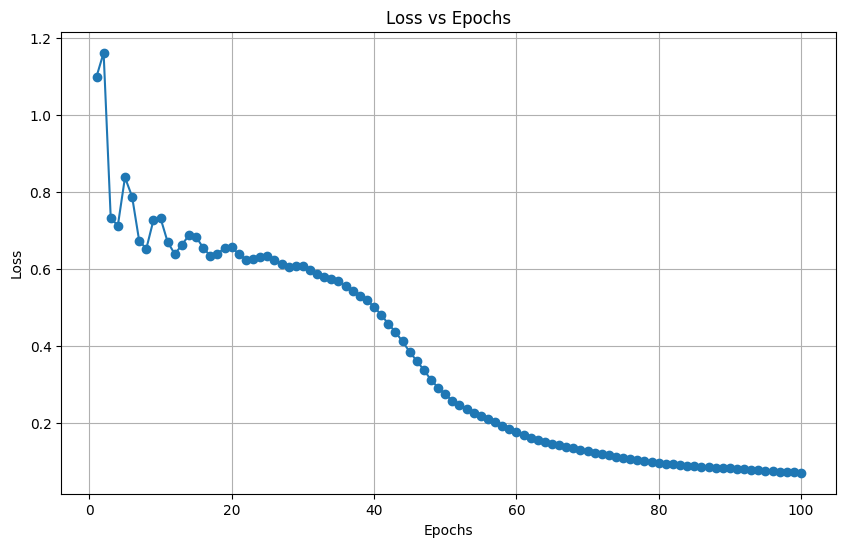

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
embed_dim = 256
num_heads = 8
d_k = embed_dim // num_heads
hidden_dim = 512
output_dim = 2

# Initialize parameters
embed_matrix = np.random.randn(vocab_size, embed_dim) / np.sqrt(vocab_size)
W_q = [np.random.randn(embed_dim, d_k) / np.sqrt(embed_dim) for _ in range(num_heads)]
W_k = [np.random.randn(embed_dim, d_k) / np.sqrt(embed_dim) for _ in range(num_heads)]
W_v = [np.random.randn(embed_dim, d_k) / np.sqrt(embed_dim) for _ in range(num_heads)]
W1 = np.random.randn(embed_dim, hidden_dim) / np.sqrt(embed_dim)
b1 = np.zeros((hidden_dim,))
W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
b2 = np.zeros((output_dim,))
gamma = np.ones((embed_dim,))
beta = np.zeros((embed_dim,))

# Helper functions
def get_positional_encoding(seq_length, d_model):
    positional_encoding = np.zeros((seq_length, d_model))
    for pos in range(seq_length):
        for i in range(0, d_model, 2):
            positional_encoding[pos, i] = np.sin(pos / (10000 ** ((2 * i)/d_model)))
            positional_encoding[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))
    return positional_encoding

def layer_norm(x, eps=1e-5):
    mean = np.mean(x, axis=-1, keepdims=True)
    variance = np.var(x, axis=-1, keepdims=True)
    return (x - mean) / np.sqrt(variance + eps)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]

# Forward pass
def forward_pass(input_matrix, embed_matrix, W_q, W_k, W_v, W1, b1, W2, b2, gamma, beta):
    input_after_embed = input_matrix @ embed_matrix
    pos_encoding = get_positional_encoding(input_after_embed.shape[1], embed_dim)
    input_with_pos = input_after_embed + pos_encoding
    
    attention_outputs = []
    attention_probs_list = []
    for i in range(num_heads):
        Q = input_with_pos @ W_q[i]
        K = input_with_pos @ W_k[i]
        V = input_with_pos @ W_v[i]
        attention_scores = Q @ K.transpose(0, 2, 1) / np.sqrt(d_k)
        attention_probs = softmax(attention_scores)
        attention_probs_list.append(attention_probs)
        attention_output = attention_probs @ V
        attention_outputs.append(attention_output)
    multi_head_output = np.concatenate(attention_outputs, axis=-1)
    
    residual_output = multi_head_output + input_with_pos
    normalized_output = layer_norm(residual_output)
    scaled_normalized_output = gamma * normalized_output + beta
    
    hidden = relu(scaled_normalized_output @ W1 + b1)
    logits = hidden @ W2 + b2
    probabilities = softmax(logits)
    sentence_probabilities = np.mean(probabilities, axis=1)
    
    return sentence_probabilities, {
        'residual_output':residual_output,
        'input_after_embed': input_after_embed,
        'input_with_pos': input_with_pos,
        'attention_probs': attention_probs_list,
        'multi_head_output': multi_head_output,
        'normalized_output': normalized_output,
        'hidden': hidden,
        'logits': logits,
        'probabilities': probabilities
    }

# Backward pass
def backward_pass(y_pred, y_true, cache):
    dL_dy_pred = y_pred - y_true  # Shape: (2, 2)
    dL_dy_pred_expanded = np.expand_dims(dL_dy_pred, axis=1)  # Shape: (2, 1, 2)
    dL_dy_pred_expanded = np.repeat(dL_dy_pred_expanded, cache['probabilities'].shape[1], axis=1)  # Shape: (2, 3, 2)

    dL_dW2 = dL_dy_pred_expanded.transpose(0, 2, 1) @ cache['hidden']
    dL_dW2 = dL_dW2.sum(axis=0).T
    dL_db2 = dL_dy_pred_expanded.sum(axis=(0, 1))

    dL_dhidden = dL_dy_pred_expanded @ W2.T
    dL_dhidden[cache['hidden'] <= 0] = 0  # ReLU gradient

    dL_dW1 = cache['normalized_output'].transpose(0, 2, 1) @ dL_dhidden
    dL_dW1 = dL_dW1.sum(axis=0)
    dL_db1 = dL_dhidden.sum(axis=(0, 1))

    dL_dln_output = dL_dhidden @ W1.T
    dL_dgamma = (dL_dln_output * cache['normalized_output']).sum(axis=(0, 1))
    dL_dbeta = dL_dln_output.sum(axis=(0, 1))

    ln_input = cache['residual_output']
    N = embed_dim  # This is the number of features, which is embed_dim in your model
    mu = np.mean(ln_input, axis=-1, keepdims=True)
    var = np.var(ln_input, axis=-1, keepdims=True)
    std_inv = 1 / np.sqrt(var + 1e-5)

    dL_dxhat = dL_dln_output * gamma
    dxhat_dvar = -0.5 * (ln_input - mu) * std_inv**3
    dL_dvar = np.sum(dL_dxhat * dxhat_dvar, axis=-1, keepdims=True)

    dxhat_dmu = -std_inv
    dL_dmu = np.sum(dL_dxhat * dxhat_dmu, axis=-1, keepdims=True)

    dL_dln_input = (dL_dxhat * std_inv + 
                    dL_dvar * 2 * (ln_input - mu) / N + 
                    dL_dmu / N)

    #dL_dln_input = dL_dln_output * gamma
    dL_dattention = dL_dln_input
    dL_dresidual = dL_dln_input
    dL_dembedding = dL_dresidual

    # Fix gradients for multi-head attention
    # Multi-head attention backpropagation

    dL_dattention = dL_dln_input
    dL_dWq = []
    dL_dWk = []
    dL_dWv = []
    dL_dQ = 0
    dL_dK = 0
    dL_dV = 0
    dL_dQ_total, dL_dK_total, dL_dV_total = 0, 0, 0

    for i in range(num_heads):
        start = i * d_k
        end = (i + 1) * d_k
        V = cache['input_with_pos'] @ W_v[i]
        K = cache['input_with_pos'] @ W_k[i]
        Q = cache['input_with_pos'] @ W_q[i]


        # print(dL_dattention.shape)

        # print(cache['attention_probs'][i].shape)




        

        dL_dV = np.transpose(cache['attention_probs'][i],(0,2,1)) @ dL_dattention[:,:,start:end]

        dL_dattention_probs = dL_dattention[:, :, start:end] @ np.transpose(V, (0, 2, 1))

        dL_dattention_scores = dL_dattention_probs * cache['attention_probs'][i] * (1 - cache['attention_probs'][i])

        dL_dQ = (dL_dattention_scores @ K) / np.sqrt(d_k)
        dL_dK = (np.transpose(dL_dattention_scores, (0, 2, 1)) @ Q) / np.sqrt(d_k)
        
        dL_dWq.append(np.transpose(cache['input_with_pos'], (0, 2, 1)) @ dL_dQ)
        dL_dWk.append(np.transpose(cache['input_with_pos'], (0, 2, 1)) @ dL_dK)
        dL_dWv.append(np.transpose(cache['input_with_pos'], (0, 2, 1)) @ dL_dV)
        
        dL_dQ_total += dL_dQ @ np.transpose(W_q[i], (1, 0))
        dL_dK_total += dL_dK @ np.transpose(W_k[i], (1, 0))
        dL_dV_total += dL_dV @ np.transpose(W_v[i], (1, 0))


    dL_dinput_with_pos = dL_dQ_total + dL_dK_total + dL_dV_total + dL_dembedding
    dL_dembed_matrix = np.transpose(train_matrix, (0, 2, 1)) @ dL_dinput_with_pos

    grads = {
        'embed_matrix': dL_dembed_matrix.sum(axis=0),
        'W_q': [dL_dWq_i.sum(axis=0) for dL_dWq_i in dL_dWq],
        'W_k': [dL_dWk_i.sum(axis=0) for dL_dWk_i in dL_dWk],
        'W_v': [dL_dWv_i.sum(axis=0) for dL_dWv_i in dL_dWv],
        'W1': dL_dW1,
        'b1': dL_db1,
        'W2': dL_dW2,
        'b2': dL_db2,
        'gamma': dL_dgamma,
        'beta': dL_dbeta
    }
    return grads

beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
learning_rate = 0.001

epoch_list = []
loss_list = []

def initialize_adam_params():
    return {
        'embed_matrix': np.zeros_like(embed_matrix),
        'W_q': [np.zeros_like(w) for w in W_q],
        'W_k': [np.zeros_like(w) for w in W_k],
        'W_v': [np.zeros_like(w) for w in W_v],
        'W1': np.zeros_like(W1),
        'b1': np.zeros_like(b1),
        'W2': np.zeros_like(W2),
        'b2': np.zeros_like(b2),
        'gamma': np.zeros_like(gamma),
        'beta': np.zeros_like(beta)
    }

# Initialize Adam parameters

# Initialize Adam parameters
momentum = initialize_adam_params()
velocity = initialize_adam_params()

# Training loop
num_epochs = 100

for epoch in range(1, num_epochs + 1):

    epoch_list.append(epoch)
    # Forward pass
    y_pred, cache = forward_pass(train_matrix, embed_matrix, W_q, W_k, W_v, W1, b1, W2, b2, gamma, beta)
    
    # Compute loss
    loss = cross_entropy_loss(y_pred, np.eye(output_dim)[train_data['emotion']])

    loss_list.append(loss)
    
    # Backward pass
    grads = backward_pass(y_pred, np.eye(output_dim)[train_data['emotion']], cache)

    # Adam optimization
    for key in grads:
        #print(key)
        if isinstance(grads[key], list):  # For W_q, W_k, W_v
            for i in range(len(grads[key])):
                momentum[key][i] = beta1 * momentum[key][i] + (1 - beta1) * grads[key][i]
                velocity[key][i] = beta2 * velocity[key][i] + (1 - beta2) * (grads[key][i]**2)
                
                m_hat = momentum[key][i] / (1 - beta1**epoch)
                v_hat = velocity[key][i] / (1 - beta2**epoch)
                
                if key == 'W_q':
                    W_q[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
                elif key == 'W_k':
                    W_k[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
                elif key == 'W_v':
                    W_v[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        else:
            momentum[key] = beta1 * momentum[key] + (1 - beta1) * grads[key]
            velocity[key] = beta2 * velocity[key] + (1 - beta2) * (grads[key]**2)
            
            m_hat = momentum[key] / (1 - beta1**epoch)
            v_hat = velocity[key] / (1 - beta2**epoch)
            
            if key == 'embed_matrix':
                embed_matrix -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            elif key == 'W1':
                W1 -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            elif key == 'b1':
                b1 -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            elif key == 'W2':
                W2 -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            elif key == 'b2':
                b2 -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            elif key == 'gamma':
                gamma -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
            elif key == 'beta':
                beta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
        # Final prediction
y_pred, _ = forward_pass(train_matrix, embed_matrix, W_q, W_k, W_v, W1, b1, W2, b2, gamma, beta)
predicted_emotions = np.argmax(y_pred, axis=-1)
print("Accuracy:", np.mean(predicted_emotions == train_data['emotion']))
# print("Final predicted emotions:", predicted_emotions)
# print("True emotions:", data['emotion'])

plt.figure(figsize=(10, 6))
plt.plot(epoch_list, loss_list, marker='o')

# Customize the plot
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

# Show the plot
plt.show()

## Test Accuracy

In [11]:
y_pred, _ = forward_pass(test_matrix, embed_matrix, W_q, W_k, W_v, W1, b1, W2, b2, gamma, beta)
predicted_emotions_test = np.argmax(y_pred, axis=-1)
print("Accuracy:", np.mean(predicted_emotions_test == test_data['emotion']))




Accuracy: 0.8292682926829268


## Positional Encoding Plot

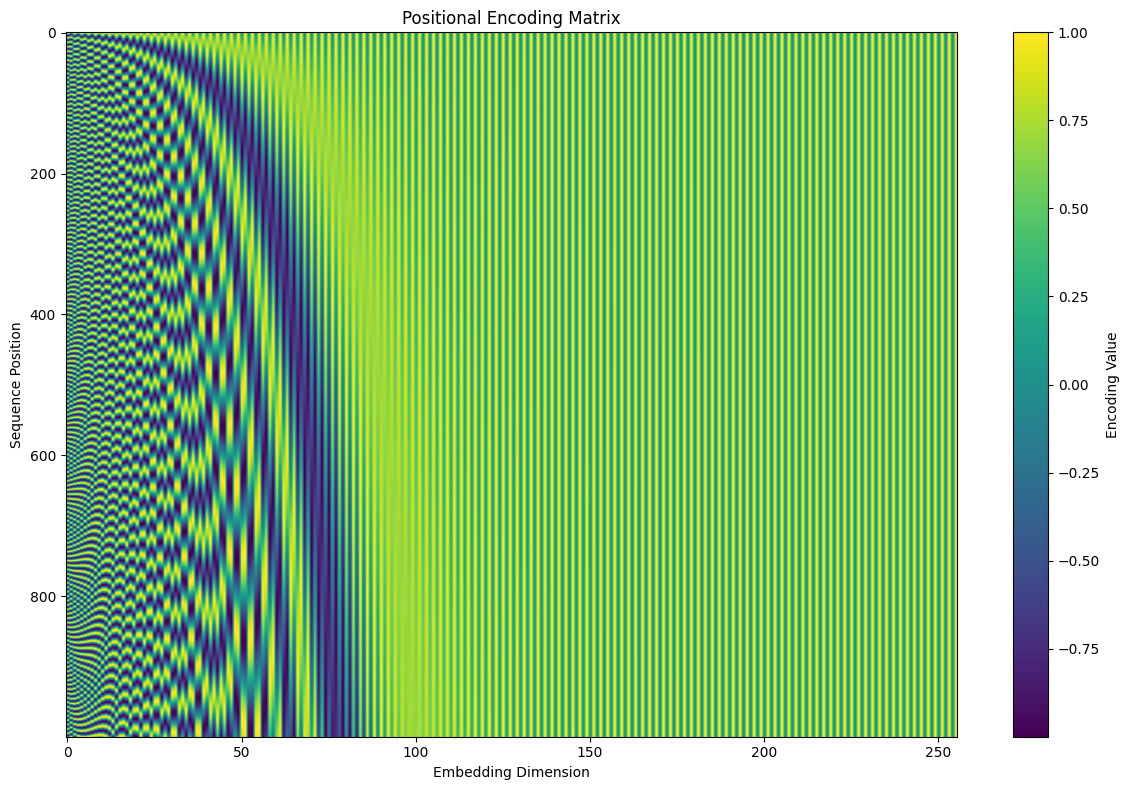

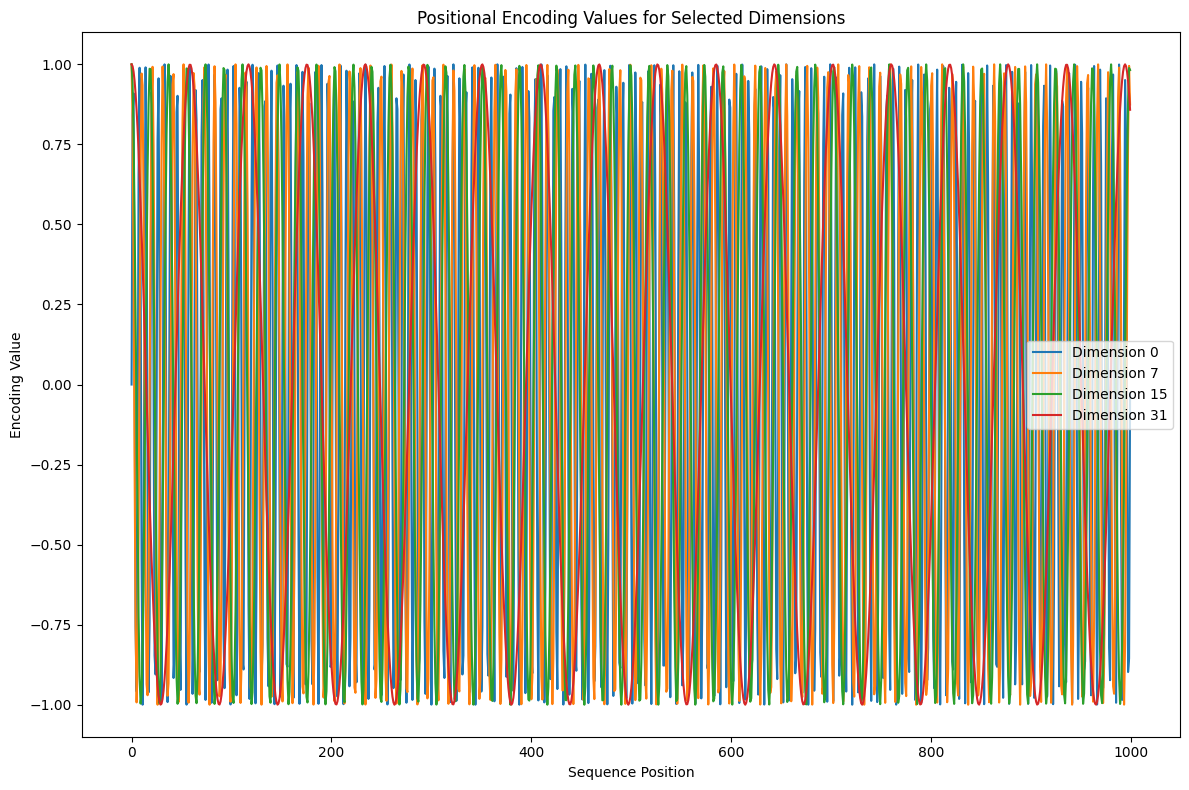

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def get_positional_encoding(seq_length, d_model):
    positional_encoding = np.zeros((seq_length, d_model))
    for pos in range(seq_length):
        for i in range(0, d_model, 2):
            positional_encoding[pos, i] = np.sin(pos / (10000 ** ((2 * i)/d_model)))
            positional_encoding[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))
    return positional_encoding

# Generate the positional encoding
seq_length = 1000
d_model = 256
pe = get_positional_encoding(seq_length, d_model)

# Create the plot
plt.figure(figsize=(12, 8))
plt.imshow(pe, cmap='viridis', aspect='auto')
plt.colorbar(label='Encoding Value')
plt.title('Positional Encoding Matrix')
plt.xlabel('Embedding Dimension')
plt.ylabel('Sequence Position')
plt.tight_layout()
plt.show()

# Plot a few individual dimensions
plt.figure(figsize=(12, 8))
dimensions_to_plot = [0, 7, 15, 31]  # Plotting 4 different dimensions
for dim in dimensions_to_plot:
    plt.plot(pe[:, dim], label=f'Dimension {dim}')
plt.title('Positional Encoding Values for Selected Dimensions')
plt.xlabel('Sequence Position')
plt.ylabel('Encoding Value')
plt.legend()
plt.tight_layout()
plt.show()